In [13]:
import sys
from pathlib import Path
import os
sys.path.append('../code')
from selective_detection import EnsembleOfCheckpoints
from selective_detection import DatasetOfPaths
from torch.utils.data import DataLoader

In [14]:
model = EnsembleOfCheckpoints(folder_path='../checkpoints/AdamW')

Loading checkpoint: ../checkpoints/AdamW\epoch0.pt
Loading checkpoint: ../checkpoints/AdamW\epoch5.pt
Loading checkpoint: ../checkpoints/AdamW\epoch10.pt
Loading checkpoint: ../checkpoints/AdamW\epoch15.pt
Loading checkpoint: ../checkpoints/AdamW\epoch20.pt
Loading checkpoint: ../checkpoints/AdamW\epoch25.pt
Loading checkpoint: ../checkpoints/AdamW\epoch30.pt
Loading checkpoint: ../checkpoints/AdamW\epoch35.pt
Loading checkpoint: ../checkpoints/AdamW\epoch40.pt
Loading checkpoint: ../checkpoints/AdamW\epoch45.pt
Loading checkpoint: ../checkpoints/AdamW\epoch50.pt
Loading checkpoint: ../checkpoints/AdamW\epoch55.pt
Loading checkpoint: ../checkpoints/AdamW\epoch60.pt
Loading checkpoint: ../checkpoints/AdamW\epoch65.pt
Loading checkpoint: ../checkpoints/AdamW\epoch70.pt
Loading checkpoint: ../checkpoints/AdamW\epoch75.pt
Loading checkpoint: ../checkpoints/AdamW\epoch80.pt
Loading checkpoint: ../checkpoints/AdamW\epoch85.pt
Loading checkpoint: ../checkpoints/AdamW\epoch90.pt
Loading checkp

In [16]:
root_path = '../data/attacks/'
test_path = os.path.join(root_path, 'test/data/')
test_grad_attack_path = os.path.join(root_path, 'test-grad-attack/data/')
test_noise_attack_path = os.path.join(root_path, 'test-noise-attack/data/')
test_suspicious_cat_path = os.path.join(root_path, 'test-suspicious-cat/data/')

In [17]:
basenames = [os.path.basename(item) for item in list(Path(test_path).rglob("*.jpg"))]
filenames_test = [os.path.join(test_path, basename) for basename in basenames]
filenames_grad_attack = [os.path.join(test_grad_attack_path, basename) for basename in basenames]
filenames_noise_attack = [os.path.join(test_noise_attack_path, basename) for basename in basenames]
filenames_suspicious_cat = [os.path.join(test_suspicious_cat_path, basename) for basename in basenames]

dataloader_test = DataLoader(dataset=DatasetOfPaths(filenames_test), batch_size=8, shuffle=False)
dataloader_grad_attack = DataLoader(dataset=DatasetOfPaths(filenames_grad_attack), batch_size=8, shuffle=False)
dataloader_noise_attack = DataLoader(dataset=DatasetOfPaths(filenames_noise_attack), batch_size=8, shuffle=False)
dataloader_suspicious_cat = DataLoader(dataset=DatasetOfPaths(filenames_suspicious_cat), batch_size=8, shuffle=False)

In [18]:
divergences_test, evaluation_test = model.voting(dataloader_test)
divergences_grad_attack, evaluation_grad_attack = model.voting(dataloader_grad_attack)
divergences_noise_attack, evaluation_noise_attack = model.voting(dataloader_noise_attack)
divergences_suspicious_cat, evaluation_suspicious_cat = model.voting(dataloader_suspicious_cat)

[0.2961626648902893, 0.0, 0.0, 0.0, 0.26862362027168274, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0931490808725357, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.005101610906422138, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.052195072174072266, 0.24563835561275482, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.8586711287498474, 0.0, 0.0, 0.0, 0.0]
[0.17165176570415497, 0.0, 0.0, 0.0, 0.299054890871048, 0.0, 1.0, 0.0]
[0.8299325704574585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8546980023384094, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.598628044128418, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.14523492753505707, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0334426648914814, 0.0, 0.585602879524231, 0.34815603494644165, 0.0, 0.9254539012908936]
[0.0, 0.0, 0.8852475881576538, 0.0, 0.3567868769168854, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.30523550510406494, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.08361065

In [29]:
import numpy as np

# Save divergences_test
np.save('divergences_test.npy', divergences_test)

# Save evaluation_test
np.save('evaluation_test.npy', evaluation_test)

# Save divergences_grad_attack
np.save('divergences_grad_attack.npy', divergences_grad_attack)

# Save evaluation_grad_attack
np.save('evaluation_grad_attack.npy', evaluation_grad_attack)

# Save divergences_noise_attack
np.save('divergences_noise_attack.npy', divergences_noise_attack)

# Save evaluation_noise_attack
np.save('evaluation_noise_attack.npy', evaluation_noise_attack)

# Save divergences_suspicious_cat
np.save('divergences_suspicious_cat.npy', divergences_suspicious_cat)

# Save evaluation_suspicious_cat
np.save('evaluation_suspicious_cat.npy', evaluation_suspicious_cat)

In [47]:
import numpy as np

def create_pdf_like_list(size):
    mean = size / 2
    std_dev = size / 4
    # Create a PDF-like distribution
    pdf = lambda x: np.exp(-((x - mean) / std_dev)**2) * (1 / (std_dev * np.sqrt(2 * np.pi)))
    res = [pdf(i) for i in range(0, size)]
    return res / sum(res)

weights = create_pdf_like_list(19)
print(weights)


[  0.0021864   0.0048551   0.0098667    0.018351    0.031234    0.048654    0.069359    0.090489     0.10804     0.11806     0.11806     0.10804    0.090489    0.069359    0.048654    0.031234    0.018351   0.0098667   0.0048551]


In [36]:
# weights = model.get_weights(n=19, k=0.05)

In [48]:
evaluation_test = weights @ divergences_test
evaluation_noise_attack = weights @ divergences_noise_attack
evaluation_grad_attack = weights @ divergences_grad_attack
evaluation_suspicious_cat = weights @ divergences_suspicious_cat

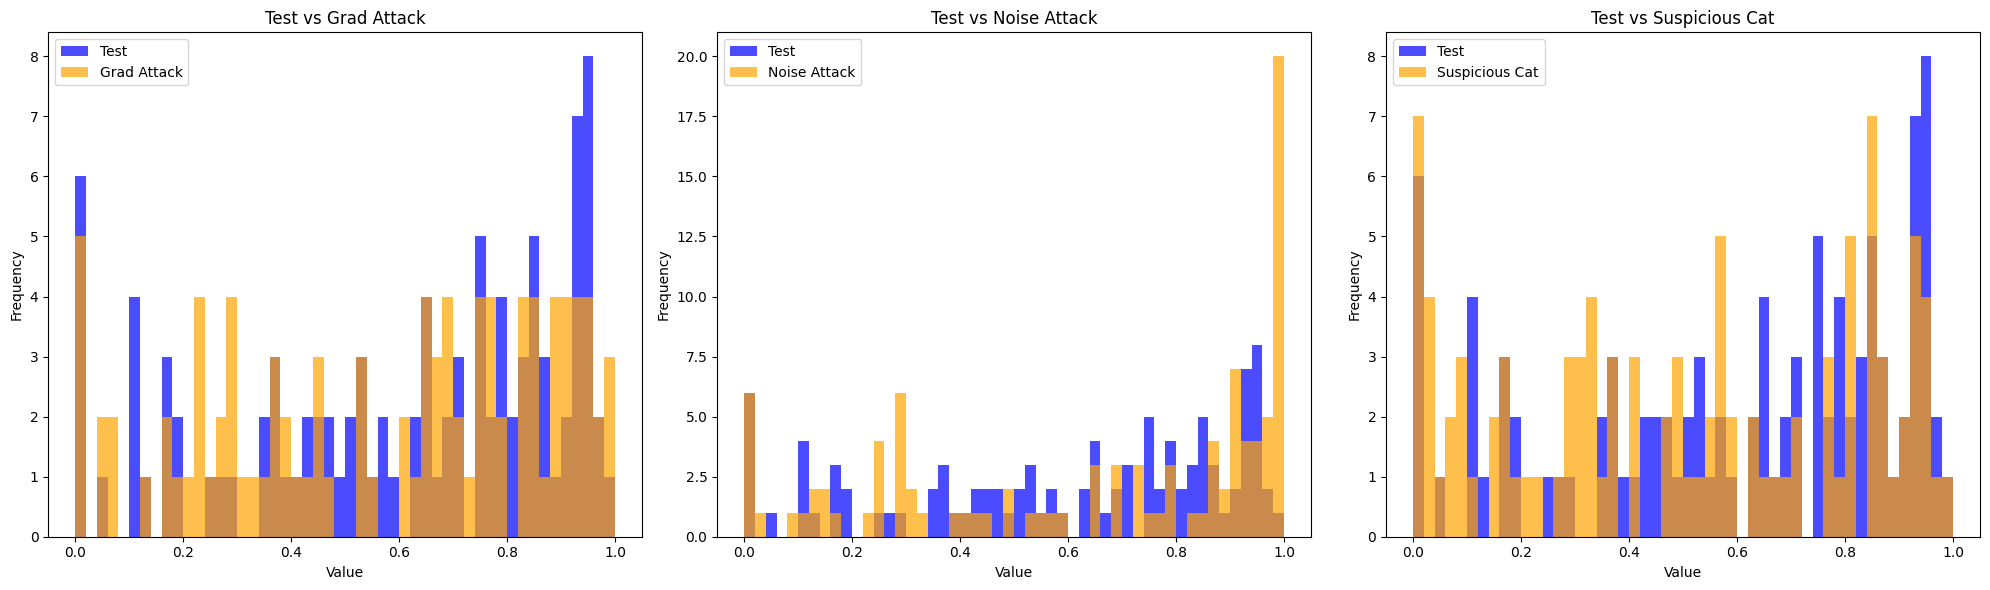

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for better visibility
colors = ['blue', 'orange']

# Create a figure with three subplots (one row, three columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot histograms for each pair of comparisons
axes[0].hist(evaluation_test, bins=50, color=colors[0], alpha=0.7, label='Test')
axes[0].hist(evaluation_grad_attack, bins=50, color=colors[1], alpha=0.7, label='Grad Attack')
axes[0].set_title('Test vs Grad Attack')
axes[0].legend()
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(evaluation_test, bins=50, color=colors[0], alpha=0.7, label='Test')
axes[1].hist(evaluation_noise_attack, bins=50, color=colors[1], alpha=0.7, label='Noise Attack')
axes[1].set_title('Test vs Noise Attack')
axes[1].legend()
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

axes[2].hist(evaluation_test, bins=50, color=colors[0], alpha=0.7, label='Test')
axes[2].hist(evaluation_suspicious_cat, bins=50, color=colors[1], alpha=0.7, label='Suspicious Cat')
axes[2].set_title('Test vs Suspicious Cat')
axes[2].legend()
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

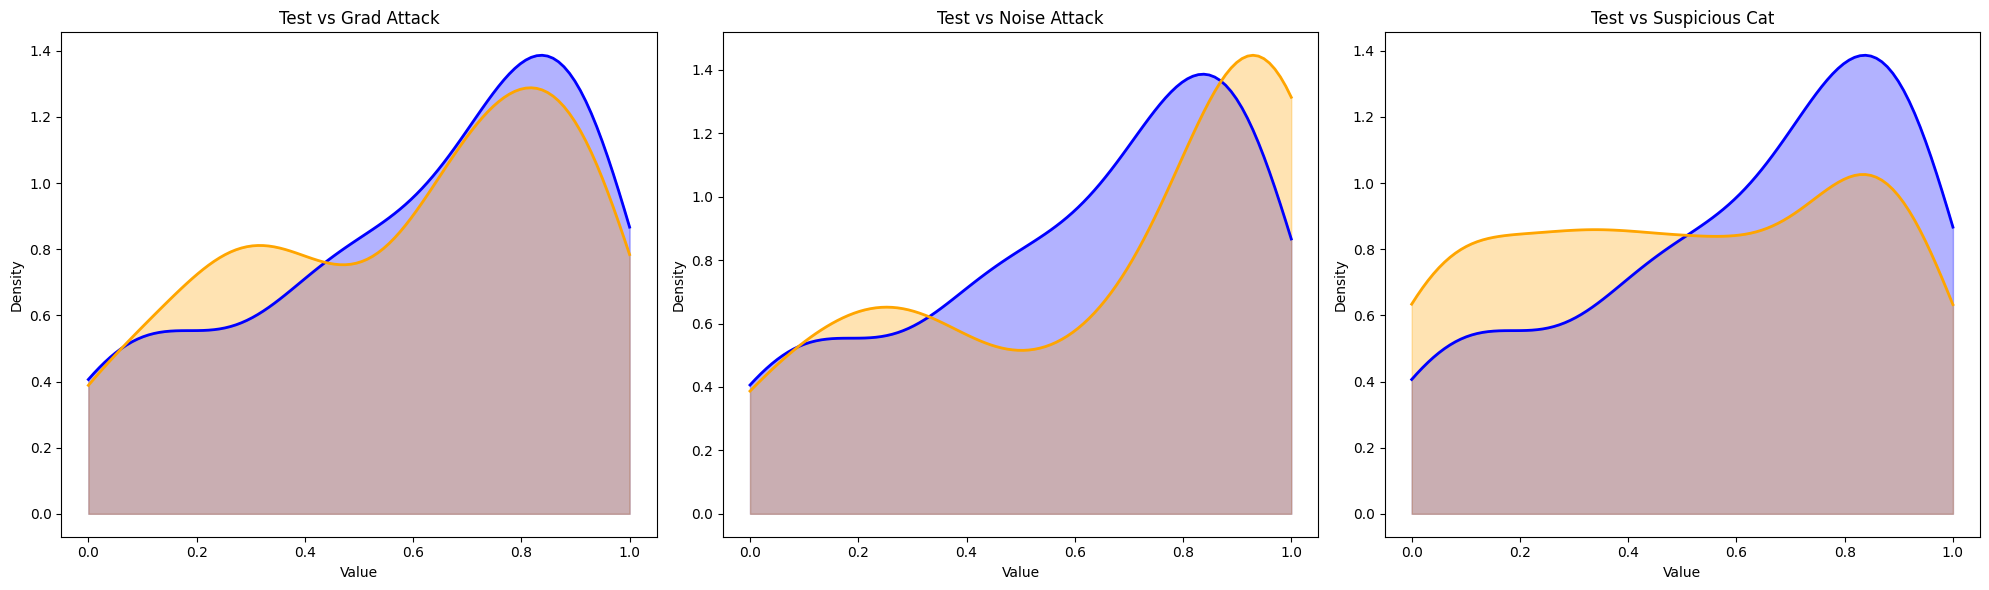

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Define colors for better visibility
colors = ['blue', 'orange']

# Create a figure with three subplots (one row, three columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Function to plot with Gaussian KDE
def plot_gaussian_kde(data, color, ax):
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 100)
    y = kde(x)
    ax.plot(x, y, color=color, linewidth=2)
    ax.fill_between(x, y, alpha=0.3, color=color)

# Plot line plots with Gaussian KDE for each pair of comparisons
plot_gaussian_kde(evaluation_test, colors[0], axes[0])
plot_gaussian_kde(evaluation_grad_attack, colors[1], axes[0])
axes[0].set_title('Test vs Grad Attack')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

plot_gaussian_kde(evaluation_test, colors[0], axes[1])
plot_gaussian_kde(evaluation_noise_attack, colors[1], axes[1])
axes[1].set_title('Test vs Noise Attack')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

plot_gaussian_kde(evaluation_test, colors[0], axes[2])
plot_gaussian_kde(evaluation_suspicious_cat, colors[1], axes[2])
axes[2].set_title('Test vs Suspicious Cat')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [40]:
sum(evaluation_test >= evaluation_suspicious_cat) / len(evaluation_test)

np.float64(0.68)

In [41]:
sum(evaluation_test >= evaluation_noise_attack) / len(evaluation_test)

np.float64(0.44)

In [42]:
sum(evaluation_test >= evaluation_grad_attack) / len(evaluation_test)

np.float64(0.58)

Обучим модель для отделения зашумлённых картинок и обычных

In [51]:
divergences_test.shape

(19, 100)

In [89]:
X = np.hstack([divergences_test, divergences_noise_attack, divergences_grad_attack]).T
y = np.concatenate([np.zeros(divergences_test.shape[1]), np.ones(divergences_noise_attack.shape[1]), np.ones(divergences_grad_attack.shape[1])])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim

In [92]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

In [132]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.fc2(out)
        return self.sigmoid(out)

In [139]:
model = SimpleClassifier(input_dim=X.shape[1], hidden_dim=50)
optimizer = optim.AdamW(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

for epoch in range(70):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()
    
    train_loss = loss.item()
    test_outputs = model(X_test_tensor)
    test_loss = loss_fn(test_outputs, y_test_tensor.view(-1, 1))
    test_loss_value = test_loss.item()
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss_value:.4f}")
model.eval()

Epoch 1, Train Loss: 0.6838, Test Loss: 0.6636
Epoch 2, Train Loss: 0.6463, Test Loss: 0.6572
Epoch 3, Train Loss: 0.6326, Test Loss: 0.6631
Epoch 4, Train Loss: 0.6344, Test Loss: 0.6685
Epoch 5, Train Loss: 0.6383, Test Loss: 0.6687
Epoch 6, Train Loss: 0.6379, Test Loss: 0.6652
Epoch 7, Train Loss: 0.6344, Test Loss: 0.6609
Epoch 8, Train Loss: 0.6302, Test Loss: 0.6573
Epoch 9, Train Loss: 0.6272, Test Loss: 0.6546
Epoch 10, Train Loss: 0.6255, Test Loss: 0.6529
Epoch 11, Train Loss: 0.6248, Test Loss: 0.6521
Epoch 12, Train Loss: 0.6246, Test Loss: 0.6514
Epoch 13, Train Loss: 0.6243, Test Loss: 0.6508
Epoch 14, Train Loss: 0.6236, Test Loss: 0.6499
Epoch 15, Train Loss: 0.6222, Test Loss: 0.6488
Epoch 16, Train Loss: 0.6204, Test Loss: 0.6477
Epoch 17, Train Loss: 0.6186, Test Loss: 0.6472
Epoch 18, Train Loss: 0.6174, Test Loss: 0.6469
Epoch 19, Train Loss: 0.6165, Test Loss: 0.6464
Epoch 20, Train Loss: 0.6154, Test Loss: 0.6454
Epoch 21, Train Loss: 0.6141, Test Loss: 0.6439
E

SimpleClassifier(
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    print(test_outputs - y_test_tensor.view(-1, 1))